# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [77]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/florian/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


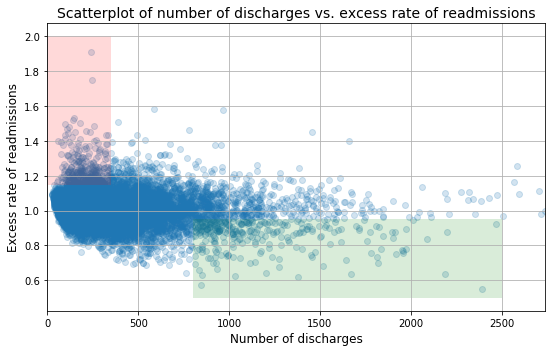

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [7]:
# Your turn

# Are the statistics the preliminary report came up with correct? Are they statistically significant?

In [8]:
clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [9]:
hospital = clean_hospital_read_df

In [10]:
low_discharges = hospital[hospital['Number of Discharges'] < 100]
high_discharges = hospital[hospital['Number of Discharges'] > 1000]

In [11]:
print(len(low_discharges),len(high_discharges))

1269 463


In [12]:
low_readmission = low_discharges['Excess Readmission Ratio'].mean()

In [13]:
high_readmission = high_discharges['Excess Readmission Ratio'].mean()

In [14]:
print(low_readmission,high_readmission)

1.0226183501683506 0.9783354211663071


In [15]:
readmission_difference = low_readmission-high_readmission
readmission_difference

0.04428292900204345

In [16]:
excess_proportion_low = len(low_discharges[low_discharges['Excess Readmission Ratio'] > 1])/ len(low_discharges)
excess_proportion_high = len(high_discharges[high_discharges['Excess Readmission Ratio'] > 1])/ len(high_discharges) 

In [17]:
print(excess_proportion_low,excess_proportion_high)

0.5918045705279747 0.4449244060475162


In [18]:
excess_proportion_difference = excess_proportion_low - excess_proportion_high
excess_proportion_difference

0.14688016448045854

In [19]:
random_readmission_differences = np.empty(10000)
for i in range(10000):
    draw = hospital.sample(n=len(low_discharges)+len(high_discharges))
    random_readmission_differences[i] = draw.iloc[:len(low_discharges)]['Excess Readmission Ratio'].mean() - draw.iloc[len(low_discharges):]['Excess Readmission Ratio'].mean()

In [20]:
random_readmission_differences

array([-0.00094062,  0.00241091,  0.00898763, ...,  0.00372097,
       -0.00492931,  0.00208462])

In [21]:
p_readmission_differences = len(random_readmission_differences[random_readmission_differences >= readmission_difference])/10000

In [69]:
p_readmission_differences 

0.0

In [23]:
random_excess_proportion_differences = np.empty(10000)
for i in range(10000):
    draw = hospital.sample(n=len(low_discharges)+len(high_discharges))
    low_draw = draw.iloc[:len(low_discharges)]
    high_draw =  draw.iloc[len(low_discharges):]
    low_excess_proportion =  len(low_draw[low_draw['Excess Readmission Ratio'] > 1])/ len(low_draw)
    high_excess_proportion = len(high_draw[high_draw['Excess Readmission Ratio'] > 1])/ len(high_draw)
    random_excess_proportion_differences[i] = low_excess_proportion - high_excess_proportion


In [24]:
random_excess_proportion_differences

array([ 0.02823774,  0.02339217, -0.01834406, ...,  0.00372055,
       -0.00494769,  0.00226195])

In [25]:
p_excess_proportion_difference = len(random_excess_proportion_differences[random_excess_proportion_differences >= excess_proportion_difference])/10000

In [26]:
p_excess_proportion_difference

0.0

It turns out, the statistics of the preliminary record are correct and they are also statistically very significant. But maybe the difference between the two groups is mainly due to outliers with an extremely high Excess Readmission Ratio? 
### I will now compute the statistics of above again, but only including hospitals with an Excess Readmission Ratio below 3 standard deviations above the mean.

In [46]:
len(hospital)

11578

In [55]:
no_outliers = hospital[hospital['Excess Readmission Ratio'] < hospital['Excess Readmission Ratio'].mean() + 3*hospital['Excess Readmission Ratio'].std()]

In [56]:
len(no_outliers)

11394

In [57]:
low_discharges = no_outliers[no_outliers['Number of Discharges'] < 100]
high_discharges = no_outliers[no_outliers['Number of Discharges'] > 1000]

In [58]:
print(len(low_discharges),len(high_discharges))

1181 461


In [59]:
low_readmission = low_discharges['Excess Readmission Ratio'].mean()

In [60]:
high_readmission = high_discharges['Excess Readmission Ratio'].mean()

In [61]:
print(low_readmission,high_readmission)

1.0203526672311605 0.9763826464208247


In [62]:
readmission_difference = low_readmission-high_readmission
readmission_difference

0.04397002081033574

In [63]:
excess_proportion_low = len(low_discharges[low_discharges['Excess Readmission Ratio'] > 1])/ len(low_discharges)
excess_proportion_high = len(high_discharges[high_discharges['Excess Readmission Ratio'] > 1])/ len(high_discharges) 

In [64]:
print(excess_proportion_low,excess_proportion_high)

0.6299745977984759 0.44251626898047725


In [65]:
excess_proportion_difference = excess_proportion_low - excess_proportion_high
excess_proportion_difference

0.18745832881799862

In [66]:
random_readmission_differences = np.empty(10000)
for i in range(10000):
    draw = no_outliers.sample(n=len(low_discharges)+len(high_discharges))
    random_readmission_differences[i] = draw.iloc[:len(low_discharges)]['Excess Readmission Ratio'].mean() - draw.iloc[len(low_discharges):]['Excess Readmission Ratio'].mean()

In [67]:
random_readmission_differences

array([-0.00133998,  0.00257726, -0.00111097, ...,  0.00373608,
        0.00406467, -0.00351387])

In [68]:
p_readmission_differences = len(random_readmission_differences[random_readmission_differences >= readmission_difference])/10000

In [70]:
p_readmission_differences 

0.0

In [71]:
random_excess_proportion_differences = np.empty(10000)
for i in range(10000):
    draw = no_outliers.sample(n=len(low_discharges)+len(high_discharges))
    low_draw = draw.iloc[:len(low_discharges)]
    high_draw =  draw.iloc[len(low_discharges):]
    low_excess_proportion =  len(low_draw[low_draw['Excess Readmission Ratio'] > 1])/ len(low_draw)
    high_excess_proportion = len(high_draw[high_draw['Excess Readmission Ratio'] > 1])/ len(high_draw)
    random_excess_proportion_differences[i] = low_excess_proportion - high_excess_proportion


In [72]:
p_excess_proportion_difference = len(random_excess_proportion_differences[random_excess_proportion_differences >= excess_proportion_difference])/10000

In [73]:
p_excess_proportion_difference

0.0

Apparently, the outliers did not affect the analysis much. But the analysed compared ranges of 'Number of Discharges' seem random. Maybe it's more interesting to see the overall correlation. 
### Thus I will now calculate the pearson's r and its p-value.

In [27]:
stats.pearsonr(hospital['Excess Readmission Ratio'], hospital['Number of Discharges'])

(nan, 1.0)

In [31]:
hosdrop = hospital.dropna(axis=0, subset=['Excess Readmission Ratio'])

In [36]:
r, p = stats.pearsonr(hosdrop['Excess Readmission Ratio'], hosdrop['Number of Discharges'])

In [37]:
p

1.222547377680967e-25

In [38]:
r

-0.09739794351079353

Apparently there is a negative correlation between those two measurements, yet it is not very strong (about -0.097). Thus there seems to not be a very high, practical significance. Probably in order to make a recommendation, other factors need to be taken into account. The statistical significance is very high on the other hand (the p-value is about 1e-25 which is far below the alpha level of 0.01). 

# Advantages and disadvantages of the plot.

The big advantage of this plot is that it relatively clearly shows the correlation between two measurements. The disadvantage is, that most individual points can't be distinguished from each other, because there are are too many points on little area. On a Hexbin plot (which I plotted below), one can see where on the plot most points lie.

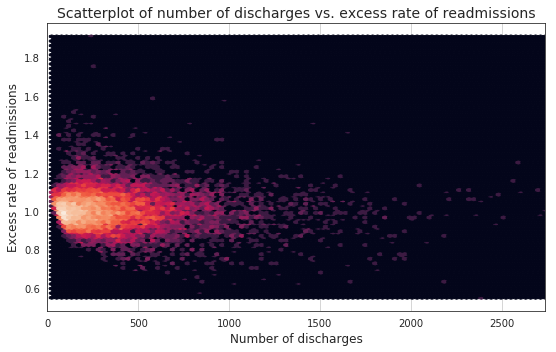

In [131]:
fig, ax = plt.subplots(figsize=(8,5))
hexe = ax.hexbin(x, y, bins='log')
ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
ax.grid(True)
fig.tight_layout()